In [1]:
from imp import reload
import sys
print(sys.version)
# import rpy2
import os
import numpy as np
import pandas as pd
from scipy import stats
#import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
# Use Type 1 fonts in plots.
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = False
# Do not wrap long lines
np.set_printoptions(linewidth=np.nan)
sns.set_style("whitegrid")
import runner
import umm

3.7.5 (default, Nov  1 2019, 02:16:23) 
[Clang 11.0.0 (clang-1100.0.33.8)]


## Running UMM and CEGO over one instance

The next cell allows running CEGO and UMM over a chosen instance and with the selected parameters

In [4]:
reload(runner)
# instance_name="LOP-synthetic,seed=123456,n=20,m=200,phi=0.5"
# instance_name = "pfsp_csum/tai20_5_8.fsp"
# instance_name="pfsp_csum/rec19.txt"
# instance_name="lop/RandB/N-p50-01"
# instance_name="lop/Spec/N-pal13"
# instance_name="lop/xLOLIB/N-be75eec_150"
instance_name="qap/nug12.dat"
budgetGA=10**3#
seed=8
budget=100
m_ini=10
budgetMM=1## NO TOCAR
eval_ranks = False
r_1 = [.1]
r_2 = [.9]
res = []
for ratio_samples_learn in r_1:
  for weight_mass_learn in r_2:
    out_filename = "pickles/"+instance_name.replace("/", "_").replace(".txt", "")#+'_Budget_'+str(budgetMM)
    df = runner.run_once("UMM", instance_name, seed,budget = budget, m_ini = m_ini, budgetMM = budgetMM, ratio_samples_learn = ratio_samples_learn, weight_mass_learn = weight_mass_learn, out_filename = out_filename, eval_ranks=eval_ranks,init='random')
#     res.append([out_filename,ratio_samples_learn, weight_mass_learn,df.Fitness.min()])
# runner.run_once("CEGO", instance_name, seed,budget = budget, m_ini = m_ini, budgetGA = budgetGA, out_filename = out_filename)

Reading instance from qap/nug12.dat


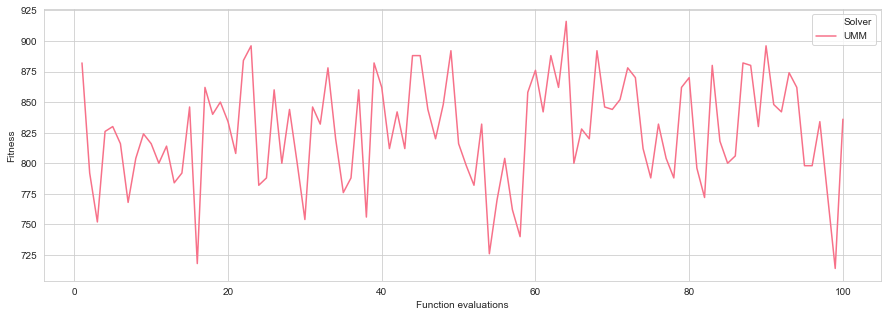

In [5]:
df = pd.read_csv(out_filename+ '.csv.xz')
df
# print("instance name", df.instance.iloc[0], "- time", round(df.run_time.iloc[0], 2))
# print(df.Fitness.min())

color_variable = 'Solver'
y_variables = ['Fitness']#,'Distance','phi_sample'
palette = sns.color_palette("husl", len(df[color_variable].drop_duplicates()))
for y_variable in y_variables:
    plt.figure(figsize=(15,5))
    sns.lineplot(x='Function evaluations',y=y_variable,hue='Solver',data=df, palette=palette)
#     plt.savefig('img/'+instance_name.replace("/", "__").replace(".txt", "")+'order.eps')
    plt.show()

- TFT pfsp_csum/tai20_5_8.fsp.txt"

    - budget=1000  -> 60k

    - budget=5000  -> 60k

    - best sols TFT https://www.researchgate.net/figure/Best-known-solutions-for-Taillards-benchmarks-with-respect-to-total-flowtime-criterion_tbl8_223094938
  
- makespan  pfsp_cmax/tai20_5_8.fsp.txt"

    - best sols makespan https://www.researchgate.net/publication/269820959_Handling_ties_in_heuristics_for_the_permutation_flow_shop_scheduling_problem/link/5e31680ba6fdccd9657373fd/download

In [41]:
n = 10
theta = 1

fact_ = np.array([1,1]+[0]*(n))
deran_num_ = np.array([0,1]+[0]*(n))
print(len(hamm_count_))

for i in range(2,n+1):
    fact_[i] = fact_[i-1] * i
    deran_num_[i] = deran_num_[i-1]*(i-1) + deran_num_[i-2]*(i-1);
hamm_count_ = [ deran_num_[d]*fact_[n] / (fact_[d] * fact_[n - d]) for d in range(n+1)]
# for ( int d = 0 ; d <= d_max ; d++) hamm_count[d] = (long double) deran_num_[d] *fact[n_] / (fact[d] * fact[n_ - d]) ;

probsd = np.array([hamm_count_[d] * np.exp(-theta * d) for d in range(n+1)])
fixed_points_num = np.random.choice(n+1,p=probsd/probsd.sum())
fixed_points = np.random.choice(n+1,fixed_points_num)
fixed_points_num, fixed_points

11


(8, array([ 4,  3,  9,  9,  4,  9, 10,  4]))

In [15]:
# np.concatenate(np.array([1,1]) + np.zeros(n))


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])